## Unit 5 | Assignment - The Power of Plots


## Option 1: Pyber

![Ride](Images/Ride.png)

The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)



In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [159]:
data_ride = pd.read_csv("./raw_data/ride_data.csv")
data_ride_df = pd.DataFrame(data_ride)
data_city = pd.read_csv("./raw_data/city_data.csv")
data_city_df = pd.DataFrame(data_city)
merged_total = pd.merge(data_city_df,data_ride_df, on = 'city')
merged_total.head()


,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [160]:
groupped = merged_total.groupby("city")
Average_fare=groupped[["fare"]].mean().reset_index(inplace=False)
Total_riders = groupped[["driver_count"]].sum().reset_index(inplace=False)
Total_drivers = groupped[["ride_id"]].count().reset_index(inplace=False)
Final_data_merge = pd.merge(Average_fare,Total_riders, on='city')
Final_data1 = pd.merge(Final_data_merge, Total_drivers, on = 'city')
Final_data = pd.merge(Final_data1, data_city_df[['city','type']], on='city')
Final_data.columns =['city', 'Average Fare', 'Total Drivers','Total Riders', 'Type']
Urban=Final_data[Final_data['Type']=='Urban']
Suburban=Final_data[Final_data['Type']=='Suburban']
Rural=Final_data[Final_data['Type']=='Rural']

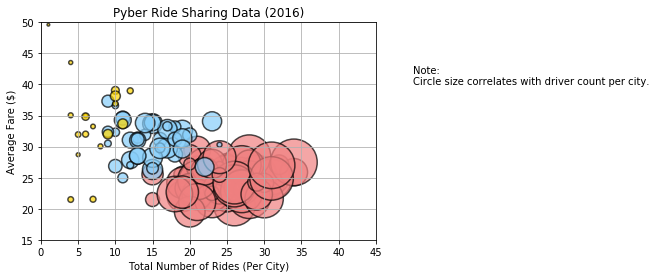

In [161]:
plt.scatter(Urban['Total Riders'], Urban['Average Fare'],s=Urban['Total Drivers'], c='lightCoral',edgecolor="black", label='Urban',alpha=0.7,linewidths=1.5)
plt.scatter(Suburban['Total Riders'], Suburban['Average Fare'],s=Suburban['Total Drivers'], c='lightskyblue',edgecolor="black", label='Suburbal',alpha=0.7,linewidths=1.5)
plt.scatter(Rural['Total Riders'], Rural['Average Fare'],s=Rural['Total Drivers'], c='gold',edgecolor="black", label='Rural',alpha=0.7,linewidths=1.5)
plt.grid(True)
plt.xlim((0,45))
plt.ylim(15,50)
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.text(50, 40, "Note:\nCircle size correlates with driver count per city.")

plt.show()


In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
* Remember when making your plots to consider aesthetics!
  * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.
* See [Example Solution](Pyber/Pyber_Example.pdf) for a reference on expected format.



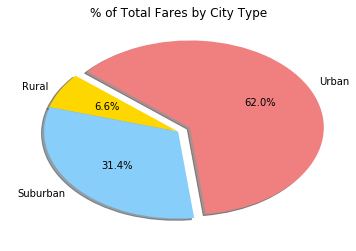

In [162]:
# % of Total Fare Per City Type
type_total=merged_total.groupby(['type']).sum()
fare_persantage=type_total['fare']*100/type_total['fare'].sum()
plt.pie(fare_persantage, shadow=True, labels=['Rural', 'Suburban', 'Urban'], colors=['gold', 'lightskyblue', 'lightcoral'], explode=[0,0,0.1],autopct='%1.1f%%',startangle=140)
plt.title('% of Total Fares by City Type')
plt.show()


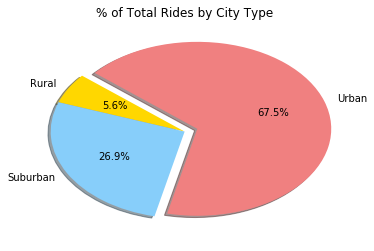

In [163]:
#% of Total Rides by City Type
riders_total = merged_total.groupby(['type']).sum()
riders_persantage = riders_total['ride_id']*100/riders_total['ride_id'].sum()
plt.pie(riders_persantage, shadow=True, labels=['Rural', 'Suburban', 'Urban'], colors=['gold', 'lightskyblue', 'lightcoral'], explode=[0,0,0.1],autopct='%1.1f%%',startangle=140)
plt.title('% of Total Rides by City Type')
plt.show()

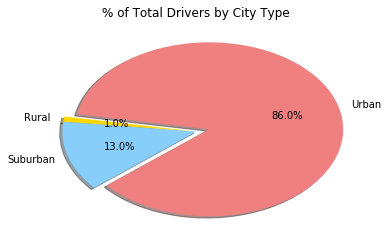

In [164]:
#% of Total Drivers by City Type
type_total
driver_percentage = type_total['driver_count']*100/type_total['driver_count'].sum()
plt.pie(driver_percentage,shadow=True, labels=['Rural', 'Suburban', 'Urban'], colors=['gold', 'lightskyblue', 'lightcoral'], explode=[0,0,0.1],autopct='%1.1f%%',startangle=170)
plt.title('% of Total Drivers by City Type')
plt.show()